# overview of campaign deployments

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

# cognac data and tools
import cognac.insitu as iu

In [2]:
# select campaign

#campaign = 'microco_leg2.yaml'
#campaign = 'lopstech19_leg1.yaml'
campaign = 'cognac20.yaml'

cp = iu.events.campaign(campaign)

In [96]:
cp["emetteur"]["j1_synchro0"]

cognac.insitu.events.deployment(j1_synchro0 / start 2020-11-23 10:56:00 7.27 43.33 / end 2020-11-23 11:06:30 7.27 43.33)

In [82]:
gps = cp.load('gps')
iridium = cp.load('iridium')
ship = cp.load('ship')
emetteur = cp.load('emission')

In [23]:
# ! tmp: waiting for cleaning up of gps data
gps['recepteur1'] = {d: g.resample('1T', interpolate=True) for d, g in iridium['recepteur1'].items()}

In [24]:
gps.keys()

dict_keys(['recepteur1', 'recepteur0', 'emetteur', 'recepteur2'])

In [33]:
gps['recepteur0'].keys()

dict_keys(['j2', 'j1'])

In [34]:
gps['recepteur0']

{'j2': cognac.insitu.gps.gps(recepteur0 - 68899 points),
 'j1': cognac.insitu.gps.gps(recepteur0 - 74239 points)}

In [35]:
type(gps['recepteur0']['j1'].d)

pandas.core.frame.DataFrame

In [36]:
gps['recepteur0']['j1'].d

,lat,lon,velocity
time,,,
2020-11-23 10:46:01,43.330767,7.267145,0.164484
2020-11-23 10:46:02,43.330768,7.267140,0.445426
2020-11-23 10:46:03,43.330768,7.267138,0.134301
2020-11-23 10:46:04,43.330770,7.267137,0.232616
2020-11-23 10:46:05,43.330770,7.267135,0.134301
...,...,...,...
2020-11-24 07:24:16,43.302960,7.179880,0.000000
2020-11-24 07:24:17,43.302958,7.179882,0.232616
2020-11-24 07:24:18,43.302955,7.179885,0.455437


In [38]:
df = gps['recepteur0']['j1'].d

In [39]:
type(df)

pandas.core.frame.DataFrame

In [40]:
df.plot?

Signature:      df.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x7fcbbf222340>
File:           ~/.miniconda3/envs/cognac/lib/python3.8/site-packages/pandas/plotting/_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : are

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>], dtype=object)

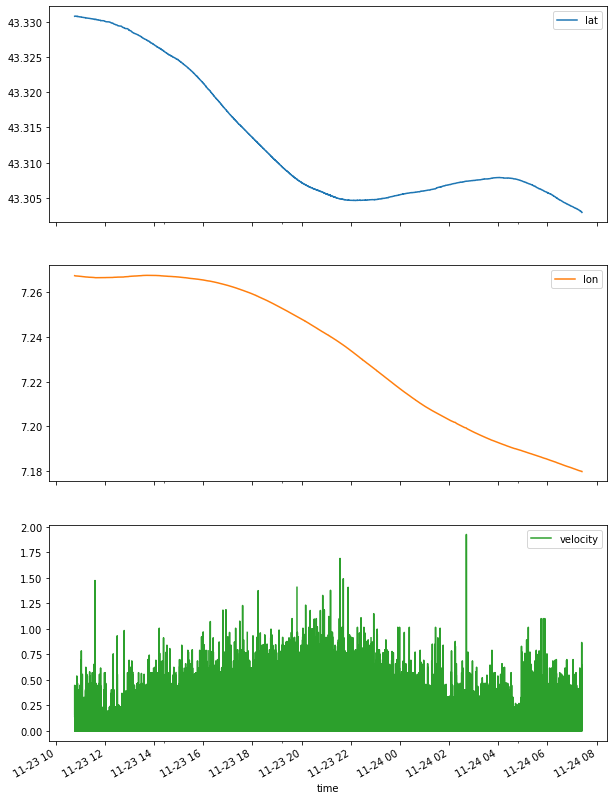

In [41]:
df.plot(subplots=True, figsize=(10,15))

In [42]:
gps['recepteur0']['j1']

cognac.insitu.gps.gps(recepteur0 - 74239 points)

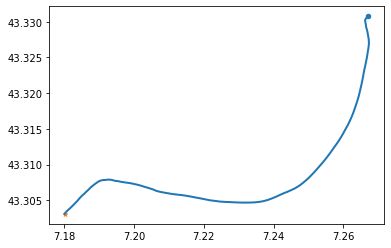

In [46]:
g = gps['recepteur0']['j1']
g.resample('10T').plot()

In [53]:
g_rs = g.resample('10T')
g_rs.compute_velocity(inplace=True)
g_rs.d

,lat,lon,velocity,u,v
time,,,,,
2020-11-23 10:40:00,43.330778,7.267067,NaN,NaN,NaN
2020-11-23 10:50:00,43.330714,7.266952,0.019515,0.015578,0.011754
2020-11-23 11:00:00,43.330622,7.266766,0.030388,0.025095,0.017138
2020-11-23 11:10:00,43.330528,7.266570,0.031521,0.026354,0.017293
2020-11-23 11:20:00,43.330434,7.266437,0.024998,0.017918,0.017430
...,...,...,...,...,...
2020-11-24 06:40:00,43.304237,7.182406,0.108241,0.089952,0.060206
2020-11-24 06:50:00,43.303944,7.181795,0.098601,0.082382,0.054180
2020-11-24 07:00:00,43.303655,7.181149,0.102328,0.087123,0.053672


array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>], dtype=object)

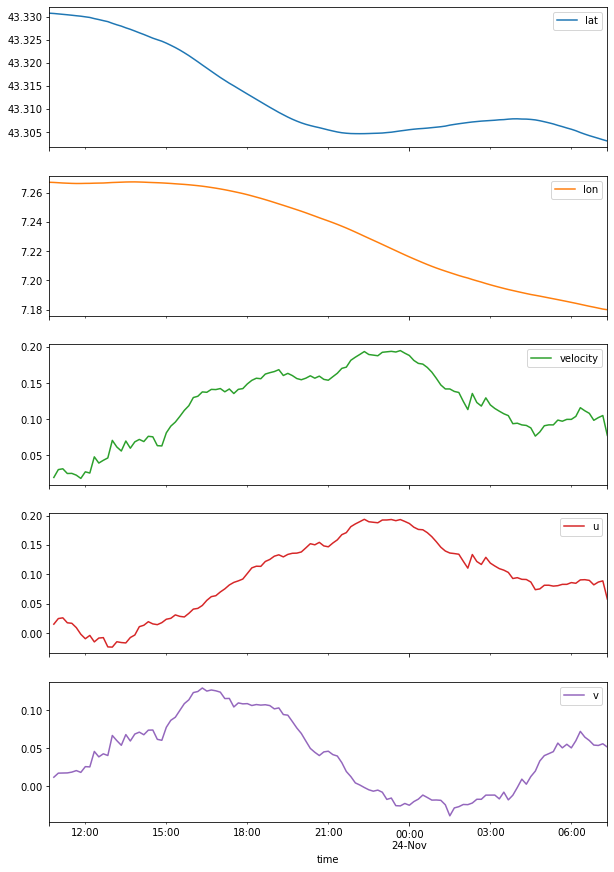

In [54]:
g_rs.d.plot(subplots=True, figsize=(10,15))

In [56]:
emetteur

{'emetteur': {'j1': <cognac.insitu.source.source_rtsys at 0x7fcbbc96ddf0>,
  'j2': <cognac.insitu.source.source_rtsys at 0x7fcbb8d66a00>}}

In [58]:
s = emetteur["emetteur"]["j1"]
s

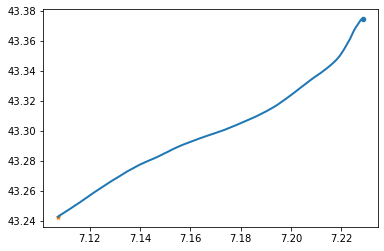

In [62]:
s.emission.plot()

In [63]:
s.emission.d

,lon,lat,sound
time,,,
2020-11-23 12:56:37,7.228472,43.374420,0.0
2020-11-23 12:57:07,7.228395,43.374447,1.0
2020-11-23 12:57:37,7.228293,43.374462,2.0
2020-11-23 12:58:07,7.228189,43.374479,3.0
2020-11-23 12:58:37,7.228137,43.374473,4.0
...,...,...,...
2020-11-24 08:42:37,7.107670,43.242771,12.0
2020-11-24 08:43:07,7.107632,43.242723,13.0
2020-11-24 08:43:37,7.107588,43.242660,14.0


### different processing

In [ ]:
gps = cp.load('gps')
iridium = cp.load('iridium')
#ship = cp.load('ship')
emetteur = cp.load('emission')

In [85]:
r = gps["recepteur0"]["j1"]
s = emetteur["emetteur"]["j1"]

In [86]:
r.d

,lat,lon,velocity
time,,,
2020-11-23 10:46:01,43.330767,7.267145,0.164484
2020-11-23 10:46:02,43.330768,7.267140,0.445426
2020-11-23 10:46:03,43.330768,7.267138,0.134301
2020-11-23 10:46:04,43.330770,7.267137,0.232616
2020-11-23 10:46:05,43.330770,7.267135,0.134301
...,...,...,...
2020-11-24 07:24:16,43.302960,7.179880,0.000000
2020-11-24 07:24:17,43.302958,7.179882,0.232616
2020-11-24 07:24:18,43.302955,7.179885,0.455437


In [87]:
s.emission.d

,lon,lat,sound
time,,,
2020-11-23 12:56:37,7.228472,43.374420,0.0
2020-11-23 12:57:07,7.228395,43.374447,1.0
2020-11-23 12:57:37,7.228293,43.374462,2.0
2020-11-23 12:58:07,7.228189,43.374479,3.0
2020-11-23 12:58:37,7.228137,43.374473,4.0
...,...,...,...
2020-11-24 08:42:37,7.107670,43.242771,12.0
2020-11-24 08:43:07,7.107632,43.242723,13.0
2020-11-24 08:43:37,7.107588,43.242660,14.0


In [88]:
t = "2020-11-23 12:57:37"
s.emission.d.loc[t]

lon       7.228293
lat      43.374462
sound     2.000000
Name: 2020-11-23 12:57:37, dtype: float64

In [90]:
r.d.loc[t]

lat         43.328863
lon          7.266782
velocity     0.391551
Name: 2020-11-23 12:57:37, dtype: float64

---
### time line

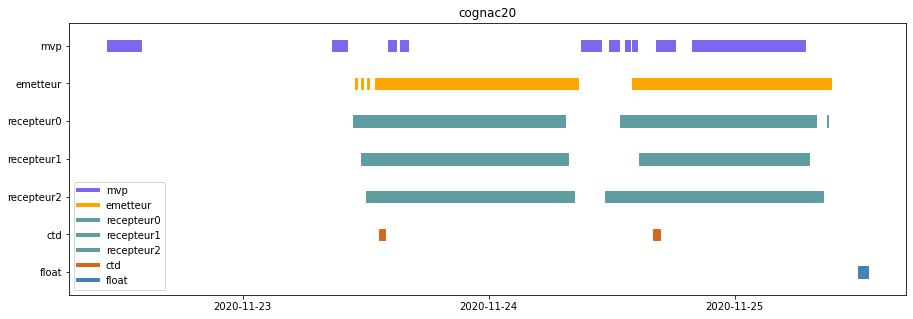

In [91]:
cp.timeline()

In [92]:
# get position from ship a posteriori, useful for synchro
for t in [cp['recepteur0']['j2_synchro'].start.time, 
          cp['recepteur0']['j2_synchro'].end.time
         ]:
    lon, lat = ship.loc[t][['lon', 'lat']]
    print(str(t)+' : '+iu.utils.print_degmin(lat)+' / '+iu.utils.print_degmin(lon))

2020-11-25 08:59:00 : 43 15.66238 / 7 5.01362
2020-11-25 09:09:00 : 43 15.58453 / 7 4.82872


---

### maps

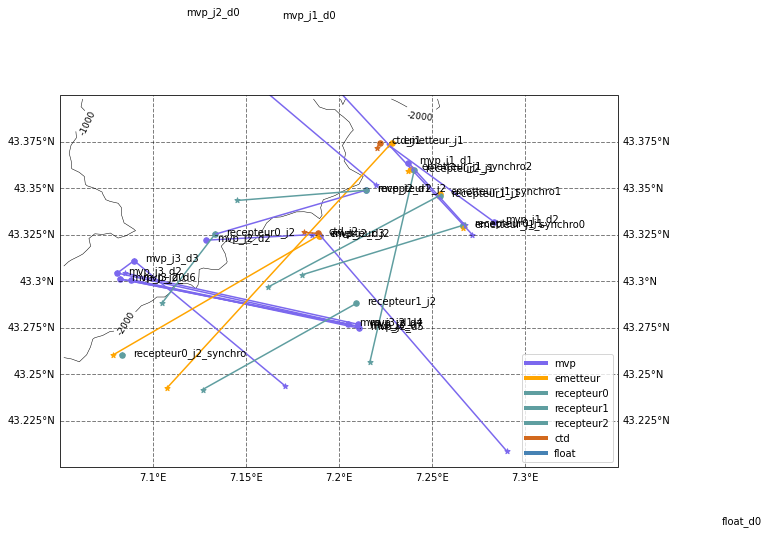

In [11]:
fac = cp.plot_map()

for uname, unit in cp.items():
    if uname=="ship":
        continue
    for d in unit:
        if unit=='ctd':
            line=False
        else:
            line=True
        if unit=='source':
            yshift=2
        else:
            yshift=0.
        if d.label!='j0':
            d.plot_on_map(fac[1], line=line, label=uname+'_'+d.label, color=unit['color'], 
                     yshift=yshift)

cp.add_legend(fac[1], loc=4)


In [12]:
cp.map()